In [1]:
from dariah_topics import preprocessing as pre
from dariah_topics import visualization as visual
from dariah_topics import evaluation

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:35.412321. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Preprocessing

#### Liste mit Dateinamen erzeugen

In [2]:
path_txt = "corpus_txt"
#path_txt = "grenzbote_plain/*/"
#path_txt = "wiki/"

doclist_txt = pre.create_document_list(path_txt)
assert doclist_txt, "No documents found"
doclist_txt[:5]

['corpus_txt/Lovecraft_AttheMountainofMadness.txt',
 'corpus_txt/Howard_TheDevilinIron.txt',
 'corpus_txt/Poe_ThePurloinedLetter.txt',
 'corpus_txt/Lovecraft_TheShunnedHouse.txt',
 'corpus_txt/Poe_TheMasqueoftheRedDeath.txt']

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:36.243248. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#####  Liste mit Dokumentenlabels erzeugen - (Funktion wird durch Thorsten's generischere Funktion ersetzt)

In [3]:
doc_labels = list(pre.get_labels(doclist_txt))
doc_labels[:5]

['Lovecraft_AttheMountainofMadness',
 'Howard_TheDevilinIron',
 'Poe_ThePurloinedLetter',
 'Lovecraft_TheShunnedHouse',
 'Poe_TheMasqueoftheRedDeath']

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:36.252114. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Corpus laden

In [4]:
corpus_txt = pre.read_from_txt(doclist_txt)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:36.267213. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Tokenisieren

In [5]:
doc_tokens = [list(pre.tokenize(txt)) for txt in list(corpus_txt)]

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:36.275856. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Create Dictionaries

In [6]:
id_types, doc_ids = pre.create_dictionaries(doc_labels, doc_tokens)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:36.560498. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Sparse BOW Model

In [7]:
sparse_bow = pre.create_mm(doc_labels, doc_tokens, id_types, doc_ids)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:36.622170. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [8]:
sparse_bow[:5]

0
doc_id token_id   
1      16384     1
       16385     8
       16387     3
       16388     1
       16389     1

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:36.990760. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Topic Modeling with Gensim

##### Saving Sparse BOW

In [9]:
pre.save_bow_mm(sparse_bow, "gensim_txt")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.007429. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Import Market Matrix

In [10]:
from gensim.models import LdaModel
from gensim.corpora import MmCorpus

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.136271. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
mm = MmCorpus("gensim_txt.mm")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.141019. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [12]:
doc2id = {value : key for key, value in doc_ids.items()}
type2id = {value : key for key, value in id_types.items()}

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.158584. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


##### Remove Features

type2id = {value : key for key, value in id_types.items()}
sparse_bow_collapsed = sparse_bow.groupby(sparse_bow.index.get_level_values('token_id')).sum()

sparse_bow_hapax = sparse_bow_collapsed.loc[sparse_bow_collapsed[0] == 1]
hapax = [type2id[key] for key in sparse_bow_hapax.index.get_level_values('token_id')]

len(hapax)

In [13]:
import os.path
basepath = os.path.abspath('.')

with open(os.path.join(basepath, "tutorial_supplementals", "stopwords", "de.txt"), 'r', encoding = 'utf-8') as f: 
    stopword_list = f.read().split('\n')
    
stopword_list = set(stopword_list)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.172883. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
hapax_from_remove = pre.find_hapax(sparse_bow, id_types)
stopwords_from_remove = pre.find_stopwords(sparse_bow, id_types, mfw=75)

#features_to_be_removed = set(hapax_from_remove + stopwords_from_remove)
features_to_be_removed = stopwords_from_remove

sparse_bow_short = pre.remove_features(sparse_bow, id_types, features_to_be_removed)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.184775. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [15]:
len(features_to_be_removed)

75

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.328330. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [16]:
pre.save_bow_mm(sparse_bow_short, "gensim_txt")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.334179. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [17]:
mm = MmCorpus("gensim_txt.mm")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.421797. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Convert sparse_bow to list of (doc, tokens) tuples (like doc2bow)

In [18]:
doc2bow_list = []

for doc in sparse_bow_short.index.groupby(sparse_bow_short.index.get_level_values('doc_id')):
    temp = [(token, count) for token, count in zip(sparse_bow_short.loc[doc].index, sparse_bow_short.loc[doc][0])]
    doc2bow_list.append(temp)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.425956. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [19]:
len(doc2bow_list)

17

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.510798. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [20]:
#model = LdaModel(corpus=mm, id2word=type2id, num_topics=60, alpha = "symmetric", passes = 10) #import momentan in visual 
# -> da ich mir noch nicht sicher bin, welche Funktionen in das tm_gensim.py sollen
model = LdaModel(corpus=mm, id2word=type2id, num_topics=20, passes = 10, iterations = 20)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:46:37.517427. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
model.get_document_topics(doc2bow_list[1])

[(1, 0.034670551185678529),
 (2, 0.033904241123165951),
 (3, 0.11535209760158363),
 (4, 0.063366544282656062),
 (5, 0.035226801353724177),
 (6, 0.01702470134459878),
 (7, 0.040311905089352403),
 (8, 0.24180638719670738),
 (10, 0.23580797164637937),
 (15, 0.094649854885207579),
 (18, 0.087808289556959185)]

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:47:21.590690. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [22]:
#Anzeige der keywords für topic n
n = 1
topic_nr_x = model.get_topic_terms(n)

topicTerms = [type2id[i[0]] for i in topic_nr_x]
topicTerms

['converged',
 'cellar',
 'letzten',
 'one-dash',
 'inconceivable',
 'guts-of',
 'immemorial',
 'seventy',
 'rescuers',
 'refolded']

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:47:21.603001. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [23]:
#Topic probabilities
topics = model.show_topics(num_topics = 40)
topics

[(0,
  '0.000*"supererogatory" + 0.000*"cannon-ball" + 0.000*"truce" + 0.000*"blaze" + 0.000*"resemblance" + 0.000*"lull" + 0.000*"craftily" + 0.000*"motley" + 0.000*"near" + 0.000*"chimney-piece"'),
 (1,
  '0.005*"converged" + 0.005*"cellar" + 0.005*"letzten" + 0.004*"one-dash" + 0.004*"inconceivable" + 0.003*"guts-of" + 0.003*"immemorial" + 0.003*"seventy" + 0.003*"rescuers" + 0.003*"refolded"'),
 (2,
  '0.010*"flattened" + 0.005*"near" + 0.005*"guessed" + 0.005*"clubbed" + 0.004*"acquainted" + 0.004*"converged" + 0.004*"hurrying" + 0.004*"bachelor" + 0.004*"mitra" + 0.003*"throat-muscles"'),
 (3,
  '0.007*"flattened" + 0.006*"celebrated" + 0.004*"debris" + 0.004*"near" + 0.004*"blaze" + 0.004*"badly-trimmed" + 0.003*"clubbed" + 0.003*"presumed" + 0.003*"vaulted" + 0.003*"monthly"'),
 (4,
  '0.008*"generated" + 0.005*"bristling" + 0.005*"inky" + 0.005*"badly-trimmed" + 0.005*"fernandez" + 0.005*"incrustation" + 0.005*"alice" + 0.004*"angell" + 0.004*"varnished" + 0.004*"humiliation"'

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:47:21.622398. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [24]:
import pandas as pd
import regex as re
def gensim2dataframe(model):
    num_topics = model.num_topics
    topics_df = pd.DataFrame(index = range(num_topics), columns= range(10))

    topics = model.show_topics(num_topics)
    
    for topic_dist in topics:    
        idx = topic_dist[0]
        temp = re.findall(r'\"(.+?)\"', topics[idx][1])
        topics_df.loc[idx] = temp
    
    return topics_df

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:47:21.642119. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [25]:
topics_df = gensim2dataframe(model)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:47:21.656176. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [26]:
doc_topic = topics_df.T
doc_topic

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,supererogatory,converged,flattened,flattened,generated,hoards,motley,instructive,elkanah,badly-trimmed,motley,sake,badly-trimmed,neglected,cannon-ball,converged,blaze,truce,wiser,cannon-ball
1,cannon-ball,cellar,near,celebrated,bristling,monkey,waiter,pips,cannon-ball,near,craftily,opposable,near,chewing,neglected,inconceivable,raj,blaze,motley,converged
2,truce,letzten,guessed,debris,inky,near,chimney-piece,amuses,converged,supererogatory,truce,wiser,fernandez,supererogatory,blaze,cannon-ball,bridges,craftily,sea-fog,egg
3,blaze,one-dash,clubbed,near,badly-trimmed,chosen,visage,supererogatory,throat-muscles,converged,millet,motley,truce,blaze,inconceivable,undertook,millet,grouped,asserting,grouped
4,resemblance,inconceivable,acquainted,blaze,fernandez,aaarh,frankland,tortuously,crete,throat-muscles,raj,supererogatory,neglected,near,converged,clinical,grouped,alice,indicated,inconceivable
5,lull,guts-of,converged,badly-trimmed,incrustation,clubbed,mitral,bandanna,egg,humiliation,cannon-ball,blaze,resemblance,cannon-ball,craftily,eastern,converged,varnished,resemblance,truce
6,craftily,immemorial,hurrying,clubbed,alice,raj,lull,sssso,yorkshire,blaze,guts-of,grouped,varnished,humiliation,bridges,watchful,labyrinths,badly-trimmed,fodder,elkanah
7,motley,seventy,bachelor,presumed,angell,ts,resemblance,lull,labyrinths,varnished,bridges,humiliation,blaze,waiter,truce,visage,motley,near,millet,motley
8,near,rescuers,mitra,vaulted,varnished,cæsar’s,grouped,blaze,near,millet,waved,raj,supererogatory,millet,motley,wented,craftily,supererogatory,blaze,neglected
9,chimney-piece,refolded,throat-muscles,monthly,humiliation,blaze,forty-pounder,puncheons,blaze,craftily,mustache,varnished,bridges,raj,undertook,recognizing,badly-trimmed,raj,approach,humiliation


/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:47:21.681619. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Visualisierung 

In [27]:
'''lda_model = 'out_easy/corpus.lda'
corpus = 'out_easy/corpus.mm'
dictionary = 'out_easy/corpus.dict'
doc_labels = 'out_easy/corpus_doclabels.txt'
interactive  = False

vis = visual.Visualization(lda_model, corpus, dictionary, doc_labels, interactive)'''

"lda_model = 'out_easy/corpus.lda'\ncorpus = 'out_easy/corpus.mm'\ndictionary = 'out_easy/corpus.dict'\ndoc_labels = 'out_easy/corpus_doclabels.txt'\ninteractive  = False\n\nvis = visual.Visualization(lda_model, corpus, dictionary, doc_labels, interactive)"

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:47:21.715104. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


##### Create a document-topic matrix (that is a pandas data frame actually)

In [28]:
doc_topic = visual.create_doc_topic(mm, model, doc_labels)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:47:21.725233. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


##### Visualize document-topic matrix

<module 'matplotlib.pyplot' from '/home/sina/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

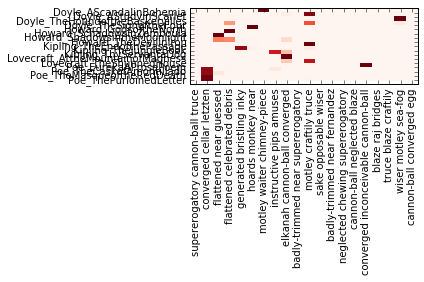

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:47:21.967807. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [29]:
%matplotlib inline
visual.doc_topic_heatmap(doc_topic)

##### Visualize topic distribution in a single document

<module 'matplotlib.pyplot' from '/home/sina/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

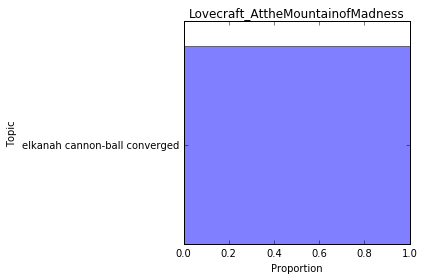

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-02 13:47:22.305142. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [30]:
visual.plot_doc_topics(doc_topic, 0)

![success](http://cdn2.hubspot.net/hub/128506/file-446943132-jpg/images/computer_woman_success.jpg)